Bank marketing is known for its nature of developing a unique brand image, which is treated as the capital reputation of the financial academy. It is very important for a bank to develop good relationship with valued customers accompanied by innovative ideas which can be used as measures to meet their requirements.

Customers expect quality services and returns. There are good chances that the quality factor will be the sole determinant of successful banking corporations. Therefore, Indian banks need to acknowledge the imperative of proactive Bank Marketing and Customer Relationship Management and also take systematic steps in this direction.

What is a Term Deposit ?
A time deposit or term deposit is a deposit in a financial institution with a specific maturity date or a period to maturity, commonly referred to as its "term". Time deposits differ from at call deposits, such as savings or checking accounts, which can be withdrawn at any time, without any notice or penalty. Deposits that require notice of withdrawal to be given are effectively time deposits, though they do not have a fixed maturity date.

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

The investor must understand when buying a term deposit that they can withdraw their funds only after the term ends. In some cases, the account holder may allow the investor early termination or withdrawal if they give several days notification. Also, there will be a penalty assessed for early termination.

Key Takeways
A term deposit is a type of deposit account held at a financial institution where money is locked up for some set period of time.
Term deposits are usually short-term deposits with maturities ranging from one month to a few years.
Typically, term deposits offer higher interest rates than traditional liquid savings accounts, whereby customers can withdraw their money at any time.
Objective:
Business goal: Reducing marketing resources by identifying customers who would subscribe to term deposit and thereby direct marketing efforts to them.

### Descripcion de las variables. 

The dataset has the following attributes:

* age (numeric)
* job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
* marital : marital status (categorical: "married","divorced","single"; note: "divorced" meansdivorced or widowed)
* education (categorical: "unknown","secondary","primary","tertiary")
* default: has credit in default? (binary: "yes","no")
* balance: average yearly balance, in euros (numeric)
* housing: has housing loan? (binary: "yes","no")
* loan: has personal loan? (binary: "yes","no")
* contact: contact communication type (categorical: "unknown","telephone","cellular")
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* duration: last contact duration, in seconds (numeric)
* campaign: number of contacts performed during this campaign and for this client (numeric,includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previouscampaign (numeric, -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical:"unknown","other","failure","success")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,11162.0,NaN,NaN,NaN,41.231948,11.913369,18.0,32.0,39.0,49.0,95.0
job,11162,12,management,2566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,11162,3,married,6351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,11162,4,secondary,5476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,11162,2,no,10994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,11162.0,NaN,NaN,NaN,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.0,81204.0
housing,11162,2,no,5881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,11162,2,no,9702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,11162,3,cellular,8042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,11162.0,NaN,NaN,NaN,15.658036,8.42074,1.0,8.0,15.0,22.0,31.0


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [18]:
# Select a numeric and category column name of dataset
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns
category_col = df.select_dtypes(include=['object']).columns

In [19]:
for col in category_col:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 3 values):
 ['divorced' 'married' 'single']
education ( 4 values):
 ['primary' 'secondary' 'tertiary' 'unknown']
default ( 2 values):
 ['no' 'yes']
housing ( 2 values):
 ['no' 'yes']
loan ( 2 values):
 ['no' 'yes']
contact ( 3 values):
 ['cellular' 'telephone' 'unknown']
month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome ( 4 values):
 ['failure' 'other' 'success' 'unknown']
deposit ( 2 values):
 ['no' 'yes']


In [7]:
df['deposit'].value_counts()/df.shape[0]

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

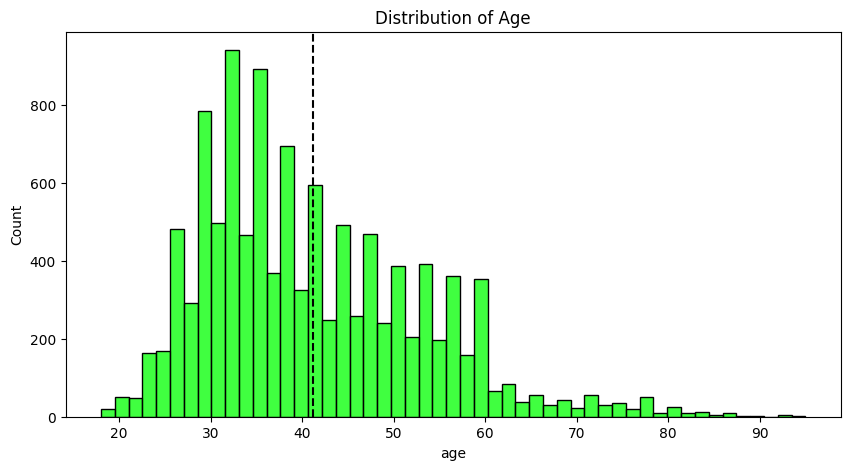

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['age'],color='lime',label='Age')
plt.axvline(x=df['age'].mean(),color='k', linestyle='--',label='Mean Age : {}'.format(round(df['age'].mean(),2)))
plt.title('Distribution of Age')
plt.show()

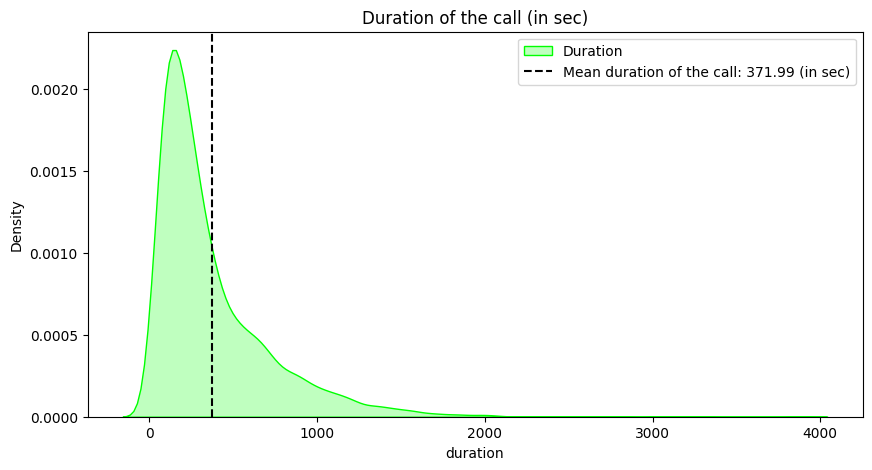

In [9]:
plt.figure(figsize=(10,5))
sns.kdeplot(x=df['duration'], color='Lime', fill=True, label='Duration')
plt.axvline(x=df['duration'].mean(), color='k', linestyle='--', label='Mean duration of the call: {} (in sec)'.format(round(df['duration'].mean(),2)))
plt.legend()
plt.title('Duration of the call (in sec)')
plt.show()

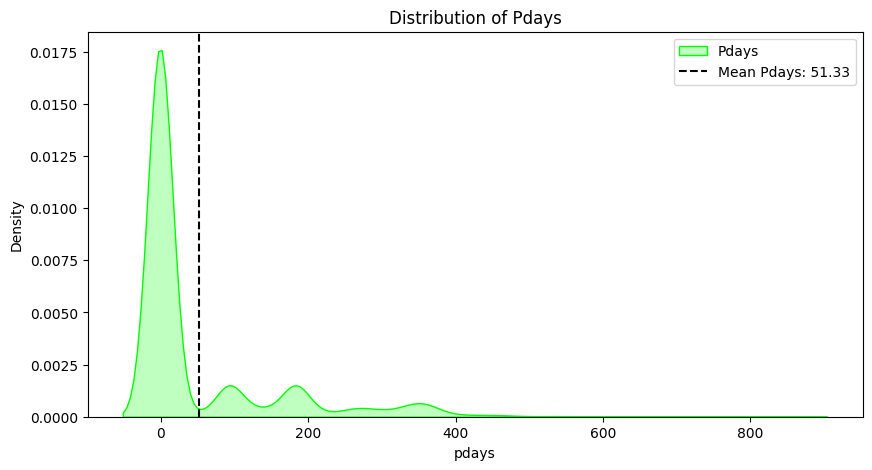

In [10]:
plt.figure(figsize=(10,5))
sns.kdeplot(x=df['pdays'], color='lime', fill=True,label='Pdays')
plt.axvline(x=df['pdays'].mean(), color='k', linestyle='--',label='Mean Pdays: {}'.format(round(df['pdays'].mean(),2)))
plt.legend()
plt.title('Distribution of Pdays')
plt.show()

In [11]:
fig=px.bar(df.job.value_counts().reset_index().rename(columns={'index': 'job', 'job': 'count'}),x='job',y='count',color='job', text='count', template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5, title_text='<b>Job type of the Customers',font_family="Times New Roman",title_font_family="Times New Roman")

## Insight 

* Management and Blue-collar Job type Clients are maximum in the bank
* There are very less number of student customers in the bank

In [12]:
fig=px.pie(df.marital.value_counts().reset_index().rename(columns={'index':'marital-status','marital':'count'}),names='marital-status',values='count', hole=0.5, template='plotly_white',color_discrete_sequence =['HotPink','LightSeaGreen','SlateBlue'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Marital-Status')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

## Insight: 
* La mayoria de los clientes en el banco son casados % 56,9 y solteros % 31,5.

In [16]:
fig=px.bar(df.education.value_counts().reset_index().rename(columns={'index':'Education','education':'Count'}),x='Education',y='Count',color='Education',text='Count',template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,legend_title_text='<b>Education',title_text='<b>Educacion de clientes',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()
fig=px.pie(df.education.value_counts().reset_index().rename(columns={'index':'Education','education':'Count'}),names='Education',values='Count',hole=0.5,template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Educacion')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

Insight📊:

Most of the customers in the bank are related to Secondary - 49.1% and Tertiary - 33% Category
only 13.4% of the clients are related to primary education category

In [17]:
fig=px.bar(df.month.value_counts().reset_index().rename(columns={'index':'Month','month':'Count'}),x='Month',y='Count',color='Month',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Ultimo mes de contacto del añi',font_family="Times New Roman",title_font_family="Times New Roman")

Insight📊:

Most of the clients in the bank are contacted in the months of May, Jun, Jul and in Aug last year.
very few of the clients are contacted in the months of Sep, Mar and in Dec